# K Nearest Neighbors Classifiers

A classification 

# Yelp Recommendation Engine

Yelp releases their data for academic purposes and challenges the students community to come up with ideas that can help evolve the company. We are breaking the dataset into a small chunk and creating a recommendation system that will help the user choose the restuarant based on a few choices they have in a particular city. 

## Exploratory Analysis

### For Business

#### We need to come up with an accepted range of data as the downloaded yelp dataset contains 10,000,000 rows and we do not have the capacity to run analysis on these many rows.

* Identify the right Category
* Idenitfy the right City
* Identify the relevant reviews


**Step 1:** Importing Libraries for exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json("yelp_academic_dataset_business.json", lines=True)

In [3]:
df_focus = df[(df['categories'].str.contains('Restaurants') == True) & df['city'].str.contains('Las Vegas') == True]

In [11]:
df_focus.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [17]:
df_b = df_focus.reset_index()

In [19]:
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'pricerange'] = df_b.loc[i].attributes['RestaurantsPriceRange2']
        if df_b.loc[i, 'pricerange'] == 'None':
            df_b.loc[i, 'pricerange'] = 0
    except:
        df_b.loc[i, 'pricerange'] = 0
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'OutdoorSeating'] = df_b.loc[i].attributes['OutdoorSeating']
        if df_b.loc[i, 'OutdoorSeating'] == 'None':
            df_b.loc[i, 'OutdoorSeating'] = 0
        else:
            df_b.loc[i, 'OutdoorSeating'] = 1
    except:
        df_b.loc[i, 'OutdoorSeating'] = 0

for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'WiFi'] = df_b.loc[i].attributes['WiFi']
        if df_b.loc[i, 'WiFi'] == "u'no'":
            df_b.loc[i, 'WiFi'] = 'None'
        elif df_b.loc[i, 'WiFi'] == "'no'":
            df_b.loc[i, 'WiFi'] = 'None'
        elif df_b.loc[i, 'WiFi'] == "'free'":
            df_b.loc[i, 'WiFi'] = 'Free'
        elif df_b.loc[i, 'WiFi'] == "u'free'":
            df_b.loc[i, 'WiFi'] = 'Free'
        elif df_b.loc[i, 'WiFi'] == "'paid'":
            df_b.loc[i, 'WiFi'] = 'Paid'
        elif df_b.loc[i, 'WiFi'] == "u'paid'":
            df_b.loc[i, 'WiFi'] = 'Paid'
    except:
        df_b.loc[i, 'WiFi'] = 'None'
        
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'GoodForKids'] = df_b.loc[i].attributes['GoodForKids']
        if df_b.loc[i, 'GoodForKids'] == 'None':
            df_b.loc[i, 'GoodForKids'] = 0
        else:
            df_b.loc[i, 'GoodForKids'] = 1
    except:
        df_b.loc[i, 'GoodForKids'] = 0

for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'Alcohol'] = df_b.loc[i].attributes['Alcohol']
        if df_b.loc[i, 'Alcohol'] == 'None':
            df_b.loc[i, 'Alcohol'] = 0
        else:
            df_b.loc[i, 'Alcohol'] = 1
    except:
        df_b.loc[i, 'Alcohol'] = 0
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'Delivery'] = df_b.loc[i].attributes['RestaurantsDelivery']
        if df_b.loc[i, 'Delivery'] != 'True':
            df_b.loc[i, 'Delivery'] = 0
        else:
            df_b.loc[i, 'Delivery'] = 1
    except:
        df_b.loc[i, 'Delivery'] = 0
        
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'Takeout'] = df_b.loc[i].attributes['RestaurantsTakeOut']
        if df_b.loc[i, 'Takeout'] != 'True':
            df_b.loc[i, 'Takeout'] = 0
        else:
            df_b.loc[i, 'Takeout'] = 1
    except:
        df_b.loc[i, 'Takeout'] = 0
        
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'Reservations'] = df_b.loc[i].attributes['RestaurantsReservations']
        if df_b.loc[i, 'Reservations'] != 'True':
            df_b.loc[i, 'Reservations'] = 0
        else:
            df_b.loc[i, 'Reservations'] = 1
    except:
        df_b.loc[i, 'Reservations'] = 0
for i,x in df_b.iterrows():
    try:
        df_b.loc[i, 'GoodforGroups'] = df_b.loc[i].attributes['RestaurantsGoodForGroups']
        if df_b.loc[i, 'GoodforGroups'] != 'True':
            df_b.loc[i, 'GoodforGroups'] = 0
        else: 
            df_b.loc[i, 'GoodforGroups'] = 1
    except:
        df_b.loc[i, 'GoodforGroups'] = 0

In [21]:
df_b.columns

Index(['level_0', 'index', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'pricerange',
       'OutdoorSeating', 'WiFi', 'GoodForKids', 'Alcohol', 'Delivery',
       'Takeout', 'Reservations', 'GoodforGroups'],
      dtype='object')

In [22]:
df_b = df_b[['name','stars', 'review_count', 'pricerange',
       'OutdoorSeating', 'WiFi', 'GoodForKids', 'Alcohol', 'Delivery',
       'Takeout', 'Reservations', 'GoodforGroups' ]]

In [28]:
df_b.head()

,name,stars,review_count,pricerange,OutdoorSeating,WiFi,GoodForKids,Alcohol,Delivery,Takeout,Reservations,GoodforGroups
0,Carluccio's Tivoli Gardens,4.0,40,2,1,1,1,1,0,1,1,1
1,Maria's Mexican Restaurant & Bakery,4.5,184,1,1,1,1,1,0,1,0,1
2,Dairy Queen,2.0,33,1,1,1,1,1,0,1,0,1
3,Imperial Asian Buffet,2.0,4,0,0,1,0,0,0,0,0,0
4,Artisan Fine Dining Room,2.0,3,4,1,1,1,1,0,0,1,1


In [30]:
df_b.pricerange.unique()

array(['2', '1', 0, '4', '3', 'None'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
labelencoder_wifi = LabelEncoder()
df_b.loc[ : ,'WiFi'] = labelencoder_wifi.fit_transform(df_b['WiFi'])

C:\Python\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
df_b = df_b[df_b['pricerange'] != 0]

In [32]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 0 to 6811
Data columns (total 12 columns):
name              6303 non-null object
stars             6303 non-null float64
review_count      6303 non-null int64
pricerange        6303 non-null object
OutdoorSeating    6303 non-null int64
WiFi              6303 non-null int64
GoodForKids       6303 non-null int64
Alcohol           6303 non-null int64
Delivery          6303 non-null int64
Takeout           6303 non-null int64
Reservations      6303 non-null int64
GoodforGroups     6303 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 640.1+ KB


In [34]:
x = df_b[['stars', 'review_count', 
       'OutdoorSeating', 'WiFi', 'GoodForKids', 'Alcohol', 'Delivery',
       'Takeout', 'Reservations', 'GoodforGroups']]

In [36]:
x = x.values

In [37]:
x.shape

(6303, 10)

In [38]:
y = df_b['pricerange'].values
y.shape

(6303,)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 5)

In [42]:
x_train.shape

(4727, 10)

In [43]:
x_test.shape

(1576, 10)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)

In [47]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred = classifier.predict(x_test)

In [49]:
y_pred

array(['1', '2', '2', ..., '2', '1', '2'], dtype=object)

In [50]:
y_test

array(['1', '2', '2', ..., '1', '1', '2'], dtype=object)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [53]:
import seaborn as sns

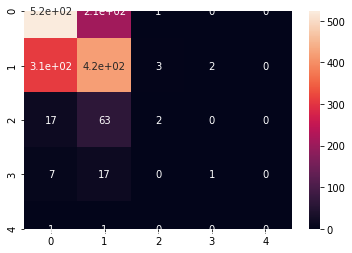

In [54]:
sns.heatmap(cm, annot = True)

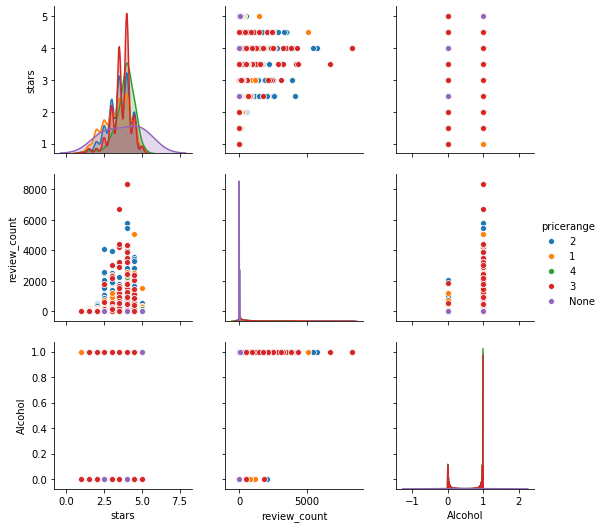

In [60]:
sns.pairplot(df_b[['pricerange','stars','review_count','Alcohol']], hue = 'pricerange')

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
predictions= knn.predict(x_test)

In [78]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, predictions):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, predictions, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, predictions, pos_label=None,
                              average='weighted')
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, predictions, pos_label=None, average='weighted')
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, predictions)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.606, precision = 0.582, recall = 0.606, f1 = 0.585


C:\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


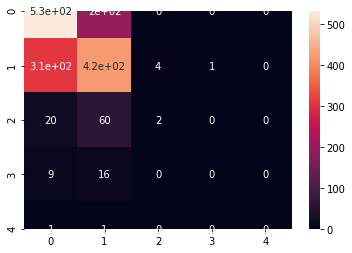

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot = True)

In [79]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Error Rate')

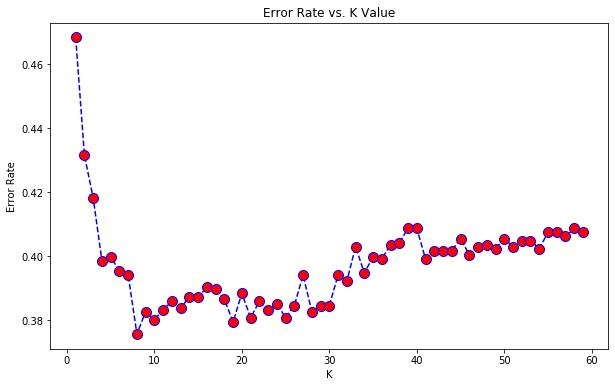

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn